In [5]:
# Nguyễn Việt Quang B22DCCN650
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# ===========================================
# 1. Đọc dữ liệu
# ===========================================
file_path = r"C:\DATA\data-ecom_quangnv.csv"  
df = pd.read_csv(file_path)

print("Tổng số mẫu:", len(df))
print(df.head())

# ===========================================
# 2. Tiền xử lý văn bản
# ===========================================
texts = df['Review_VN'].astype(str).tolist()
labels = df['Rating'].values - 1  # chuyển từ [1-5] -> [0-4] cho classification

# Nguyễn Việt Quang B22DCCN650
# Tokenizer chuyển text sang số
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding cho cùng độ dài
max_len = 50
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Chuyển label sang one-hot (nếu classification)
y = tf.keras.utils.to_categorical(labels, num_classes=5)

# ===========================================
# 3. Xây dựng mô hình LSTM (model1)
# ===========================================
embedding_dim = 128

model1 = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=True),
    LSTM(32, return_sequences=True),
    LSTM(16),
    Dense(5, activation='softmax')
])

# Nguyễn Việt Quang B22DCCN650
model1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model1.summary()

# ===========================================
# 4. Huấn luyện mô hình
# ===========================================
history = model1.fit(
    X, y,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Nguyễn Việt Quang B22DCCN650
# ===========================================
# 5. Đánh giá & lưu model
# ===========================================
loss, acc = model1.evaluate(X, y)
print(f"Độ chính xác trên toàn bộ tập: {acc:.2f}")

model1.save("model1_lstm_ecom.h5")
print("Đã lưu model: model1_lstm_ecom.h5")


Tổng số mẫu: 50000
      UserID        ItemID  Rating  \
0  User_0001  Clothes_0001       4   
1  User_0001   Laptop_0002       4   
2  User_0001    Phone_0003       1   
3  User_0001    Phone_0004       1   
4  User_0001  Clothes_0005       1   

                                           Review_VN Category  
0   Chất liệu tốt, màu đúng hình, chỉ hơi rộng chút.  clothes  
1            Máy chạy mượt, nhưng bàn phím hơi cứng.   laptop  
2  Điện thoại lỗi, sạc không vào, thật sự thất vọng.    phone  
3  Điện thoại lỗi, sạc không vào, thật sự thất vọng.    phone  
4                     Áo rách khi nhận hàng, rất tệ.  clothes  


D:\program-file\envs\assign6_recommender\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 152s 115ms/step - accuracy: 0.3952 - loss: 1.1523 - val_accuracy: 0.3993 - val_loss: 1.1153
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 150s 120ms/step - accuracy: 0.3980 - loss: 1.1107 - val_accuracy: 0.3993 - val_loss: 1.1155
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 115ms/step - accuracy: 0.4054 - loss: 1.1527 - val_accuracy: 0.3969 - val_loss: 1.0608
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 153s 122ms/step - accuracy: 0.4063 - loss: 1.0514 - val_accuracy: 0.3969 - val_loss: 1.0523
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 149s 119ms/step - accuracy: 0.4051 - loss: 1.0481 - val_accuracy: 0.3902 - val_loss: 1.0509
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.4018 - loss: 1.0472


Độ chính xác trên toàn bộ tập: 0.40
Đã lưu model: model1_lstm_ecom.h5


In [8]:
# ===========================================1.2
# Nguyễn Việt Quang B22DCCN650
# 1. Import thư viện
# ===========================================
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# ===========================================
# 2. Đọc dữ liệu
# ===========================================
file_path = r"C:\DATA\data-ecom_quangnv.csv"  
df = pd.read_csv(file_path)

print("Tổng số dòng:", len(df))
print(df.head())

# Nguyễn Việt Quang B22DCCN650
# ===========================================
# 3. Chuẩn bị dữ liệu huấn luyện
# ===========================================
texts = df["Review_VN"].astype(str).tolist()
labels = df["Category"].astype(str).tolist()

# Tokenizer để chuyển review thành chuỗi số
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
X = pad_sequences(tokenizer.texts_to_sequences(texts), maxlen=50, padding='post')

# Mã hóa nhãn (Category)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y)

print("Các nhãn:", label_encoder.classes_)

# Nguyễn Việt Quang B22DCCN650
# ===========================================
# 4. Xây dựng model1 (LSTM 128-64-32-16)
# ===========================================
embedding_dim = 128

model1 = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=50),
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=True),
    LSTM(32, return_sequences=True),
    LSTM(16),
    Dense(3, activation='softmax')  # 3 loại: phone, laptop, clothes
])

model1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model1.summary()

# Nguyễn Việt Quang B22DCCN650
# ===========================================
# 5. Huấn luyện model1
# ===========================================
history = model1.fit(
    X, y,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ===========================================
# 6. Lưu model đã huấn luyện
# ===========================================
model1.save("model1_predict_interest.h5")
print("✅ Đã lưu model: model1_predict_interest.h5")

# Nguyễn Việt Quang B22DCCN650
# ===========================================
# 7. Dự đoán loại sản phẩm yêu thích
# ===========================================
new_reviews = [
    "Điện thoại pin khỏe, màn hình sáng rõ, camera rất tốt.",
    "Áo đẹp, vải mịn, màu giống hình, tôi rất thích!",
    "Laptop chạy mượt, pin bền, rất phù hợp để làm việc."
]

seqs = tokenizer.texts_to_sequences(new_reviews)
padded = pad_sequences(seqs, maxlen=50, padding='post')

preds = model1.predict(padded)
pred_classes = label_encoder.inverse_transform(preds.argmax(axis=1))

print("\n🎯 Kết quả dự đoán:")
for review, cat in zip(new_reviews, pred_classes):
    print(f"- Review: {review}\n  → Dự đoán: {cat}\n")


Tổng số dòng: 50000
      UserID        ItemID  Rating  \
0  User_0001  Clothes_0001       4   
1  User_0001   Laptop_0002       4   
2  User_0001    Phone_0003       1   
3  User_0001    Phone_0004       1   
4  User_0001  Clothes_0005       1   

                                           Review_VN Category  
0   Chất liệu tốt, màu đúng hình, chỉ hơi rộng chút.  clothes  
1            Máy chạy mượt, nhưng bàn phím hơi cứng.   laptop  
2  Điện thoại lỗi, sạc không vào, thật sự thất vọng.    phone  
3  Điện thoại lỗi, sạc không vào, thật sự thất vọng.    phone  
4                     Áo rách khi nhận hàng, rất tệ.  clothes  
Các nhãn: ['clothes' 'laptop' 'phone']


D:\program-file\envs\assign6_recommender\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 148s 109ms/step - accuracy: 0.6517 - loss: 0.4929 - val_accuracy: 0.6575 - val_loss: 0.4652
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 148s 118ms/step - accuracy: 0.6593 - loss: 0.4829 - val_accuracy: 0.6657 - val_loss: 0.4669
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 115ms/step - accuracy: 0.6696 - loss: 0.4656 - val_accuracy: 0.6657 - val_loss: 0.4569
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 108ms/step - accuracy: 0.6679 - loss: 0.4633 - val_accuracy: 0.6657 - val_loss: 0.4581
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 106ms/step - accuracy: 0.6289 - loss: 0.5954 - val_accuracy: 0.6092 - val_loss: 0.6285


✅ Đã lưu model: model1_predict_interest.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step

🎯 Kết quả dự đoán:
- Review: Điện thoại pin khỏe, màn hình sáng rõ, camera rất tốt.
  → Dự đoán: clothes

- Review: Áo đẹp, vải mịn, màu giống hình, tôi rất thích!
  → Dự đoán: clothes

- Review: Laptop chạy mượt, pin bền, rất phù hợp để làm việc.
  → Dự đoán: laptop



In [ ]:
# ===========================================1.3
# 1. Import thư viện
# ===========================================
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# ===========================================
# 2. Đọc dữ liệu
# ===========================================
file_path = "data-ecom_quangnv.csv"
df = pd.read_csv(file_path)

texts = df["Review_VN"].astype(str).tolist()
labels = df["Category"].astype(str).tolist()

# Tokenizer và padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
X = pad_sequences(tokenizer.texts_to_sequences(texts), maxlen=50, padding='post')

# Mã hóa nhãn
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y)

print("Các nhãn:", label_encoder.classes_)

# ===========================================
# 3. Xây dựng model2 với dropout 0.2 ở 3 lớp đầu
# ===========================================
embedding_dim = 128

# Nguyễn Việt Quang B22DCCN650 
model2 = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=50),

    # Layer 1: LSTM 128 + Dropout 0.2
    LSTM(128, return_sequences=True),
    Dropout(0.2),

    # Layer 2: LSTM 64 + Dropout 0.2
    LSTM(64, return_sequences=True),
    Dropout(0.2),

    # Layer 3: LSTM 32 + Dropout 0.2
    LSTM(32, return_sequences=True),
    Dropout(0.2),

    # Layer 4: LSTM 16 (không dropout)
    LSTM(16),

    # Output layer
    Dense(3, activation='softmax')  # 3 loại: phone, laptop, clothes
])

# ===========================================
# 4. Compile model2
# ===========================================
model2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model2.summary()

# ===========================================
# 5. Huấn luyện model2
# ===========================================
history = model2.fit(
    X, y,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ===========================================
# 6. Lưu model2
# ===========================================
model2.save("model2_lstm_dropout.h5")
print("✅ Đã lưu model: model2_lstm_dropout.h5")

# ===========================================
# 7. Dự đoán thử với model2
# ===========================================
new_reviews = [
    "Điện thoại pin khỏe, sạc nhanh, màn hình sáng rõ.",
    "Áo đẹp, màu tươi, vải mịn, rất thích!",
    "Laptop chạy êm, pin bền, phù hợp học tập."
]

seqs = tokenizer.texts_to_sequences(new_reviews)
padded = pad_sequences(seqs, maxlen=50, padding='post')

preds = model2.predict(padded)
pred_classes = label_encoder.inverse_transform(preds.argmax(axis=1))

print("\n🎯 Kết quả dự đoán (model2):")
for review, cat in zip(new_reviews, pred_classes):
    print(f"- Review: {review}\n  → Dự đoán: {cat}\n")



🚀 Training model1 (No Dropout)...
Epoch 1/4


D:\program-file\envs\assign6_recommender\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 128s 97ms/step - accuracy: 0.6583 - loss: 0.5054 - val_accuracy: 0.6768 - val_loss: 0.5958
Epoch 2/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 119s 96ms/step - accuracy: 0.6623 - loss: 0.5973 - val_accuracy: 0.6768 - val_loss: 0.5867
Epoch 3/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 129s 103ms/step - accuracy: 0.6623 - loss: 0.5957 - val_accuracy: 0.6768 - val_loss: 0.5870
Epoch 4/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 121s 97ms/step - accuracy: 0.6628 - loss: 0.5950 - val_accuracy: 0.6768 - val_loss: 0.5889

🚀 Training model2 (Dropout=0.2)...
Epoch 1/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 131s 99ms/step - accuracy: 0.6538 - loss: 0.4874 - val_accuracy: 0.6575 - val_loss: 0.4628
Epoch 2/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 125s 100ms/step - accuracy: 0.6636 - loss: 0.4659 - val_accuracy: 0.6768 - val_loss: 0.4615
Epoch 3/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 125s 100ms/step - accuracy: 0.6646 - loss: 0.4657 - val_accuracy: 0.6575 - val_loss: 0.4626
Epoch 4/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 129s 1

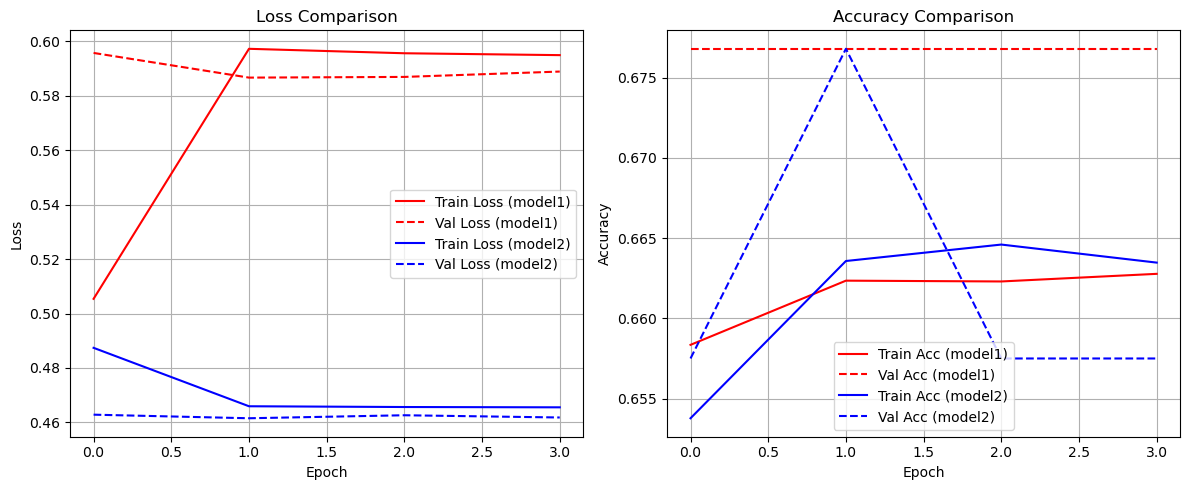


📊 Đánh giá model1: ✅ Không có overfitting rõ rệt (chênh lệch -0.01)
📊 Đánh giá model2: ✅ Không có overfitting rõ rệt (chênh lệch 0.01)
💾 Model1 (No Dropout) đã được lưu tại: C:\DATA\models_ecom_quangnv\model1_no_dropout.h5
💾 Model2 (Dropout=0.2) đã được lưu tại: C:\DATA\models_ecom_quangnv\model2_lstm_dropout.h5


In [23]:
# ===========================================1.4
# 1. Import thư viện
# ===========================================
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# ===========================================
# 2. Đọc dữ liệu
# ===========================================
file_path = r"C:\DATA\data-ecom_quangnv.csv"  
df = pd.read_csv(file_path)

texts = df["Review_VN"].astype(str).tolist()
labels = df["Category"].astype(str).tolist()

# Tokenizer và padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
X = pad_sequences(tokenizer.texts_to_sequences(texts), maxlen=50, padding='post')

# Mã hóa nhãn
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y)

# ===========================================
# 3. Xây dựng model1 (Không dropout)
# Nguyễn Việt Quang B22DCCN650
# ===========================================
embedding_dim = 128

model1 = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=50),
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=True),
    LSTM(32, return_sequences=True),
    LSTM(16),
    Dense(3, activation='softmax')
])

model1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# ===========================================
# Nguyễn Việt Quang B22DCCN650
# 4. Xây dựng model2 (Dropout 0.2 ở 3 lớp đầu)
# ===========================================
model2 = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=50),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=True),
    Dropout(0.2),
    LSTM(16),
    Dense(3, activation='softmax')
])

model2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# ===========================================
# 5. Huấn luyện cả 2 model
# Nguyễn việt Quang B22DCCN650
# ===========================================
print("\n🚀 Training model1 (No Dropout)...")
history1 = model1.fit(
    X, y,
    epochs=4,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

print("\n🚀 Training model2 (Dropout=0.2)...")
history2 = model2.fit(
    X, y,
    epochs=4,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ===========================================
# Nguyễn việt Quang B22DCCN650
# 6. So sánh Loss & Accuracy (Visualize)
# ===========================================
plt.figure(figsize=(12, 5))
# ---- Loss ----
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], 'r-', label='Train Loss (model1)')
plt.plot(history1.history['val_loss'], 'r--', label='Val Loss (model1)')
plt.plot(history2.history['loss'], 'b-', label='Train Loss (model2)')
plt.plot(history2.history['val_loss'], 'b--', label='Val Loss (model2)')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
# ---- Accuracy ----
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], 'r-', label='Train Acc (model1)')
plt.plot(history1.history['val_accuracy'], 'r--', label='Val Acc (model1)')
plt.plot(history2.history['accuracy'], 'b-', label='Train Acc (model2)')
plt.plot(history2.history['val_accuracy'], 'b--', label='Val Acc (model2)')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ===========================================
# Nguyễn việt Quang B22DCCN650
# 7. Kết luận nhanh về overfitting
# ===========================================
def check_overfit(hist):
    train_acc = hist.history['accuracy'][-1]
    val_acc = hist.history['val_accuracy'][-1]
    diff = train_acc - val_acc
    if diff > 0.1:
        return f"⚠️ Có dấu hiệu overfitting (chênh lệch {diff:.2f})"
    else:
        return f"✅ Không có overfitting rõ rệt (chênh lệch {diff:.2f})"

print("\n📊 Đánh giá model1:", check_overfit(history1))
print("📊 Đánh giá model2:", check_overfit(history2))

# ===========================================
# 8. Lưu lại 2 model đã huấn luyện
# ===========================================
import os
save_dir = r"C:\DATA\models_ecom_quangnv"
os.makedirs(save_dir, exist_ok=True)
# Lưu model1
model1_path = os.path.join(save_dir, "model1_no_dropout.h5")
model1.save(model1_path)
print(f"💾 Model1 (No Dropout) đã được lưu tại: {model1_path}")
# Lưu model2
model2_path = os.path.join(save_dir, "model2_lstm_dropout.h5")
model2.save(model2_path)
print(f"💾 Model2 (Dropout=0.2) đã được lưu tại: {model2_path}")



In [ ]:
# ===========================================
# Nguyễn Việt Quang B22DCCN650
# 1. Import thư viện
# ===========================================
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import numpy as np

# ===========================================
# 2. Đọc dữ liệu & tokenizer, encoder (phục hồi)
# ===========================================
file_path = "data-ecom_quangnv.csv"
df = pd.read_csv(file_path)

texts = df["Review_VN"].astype(str).tolist()
labels = df["Category"].astype(str).tolist()

# Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(labels)


# ===========================================
# 3. Load model2 đã huấn luyện
# Nguyễn Việt Quang B22DCCN650
# ===========================================
model2 = tf.keras.models.load_model("model2_lstm_dropout.h5")
print("✅ Đã load model2 thành công!")

# ===========================================
# 4. Dữ liệu test (review người dùng)
# ===========================================
new_reviews = [
    "Tôi rất thích chiếc điện thoại này, pin khỏe, màn hình rõ, dùng rất mượt.",
    "Chiếc laptop này rất bền, gõ phím êm và chạy mượt mà.",
    "Áo này vải mềm, màu đẹp, mặc thoải mái vô cùng.",
    "Máy tính chạy ổn, pin tốt, màn hình sắc nét.",
    "Quần này form đẹp, chất liệu mịn, rất đáng tiền.",
    "Điện thoại hay bị nóng, nhưng camera chụp đẹp.",
    "Áo bị phai màu sau khi giặt lần đầu, thất vọng.",
]

# Chuyển văn bản → chuỗi số
seqs = tokenizer.texts_to_sequences(new_reviews)
padded = pad_sequences(seqs, maxlen=50, padding='post')

# ===========================================
# 5. Dự đoán
# Nguyễn Việt Quang B22DCCN650
# ===========================================
preds = model2.predict(padded)
pred_classes = label_encoder.inverse_transform(preds.argmax(axis=1))
probabilities = np.max(preds, axis=1)

# ===========================================
# 6. Hiển thị kết quả
# ===========================================
print("\n🎯 Dự đoán sở thích người dùng (model2):\n")
for review, cat, prob in zip(new_reviews, pred_classes, probabilities):
    print(f"- Review: {review}\n  → Dự đoán: {cat.upper()} ({prob*100:.2f}%)\n")


In [ ]:
# =========================================== 1.6
# 1. Import thư viện
# Nguyễn Việt Quang B22DCCN650
# ===========================================
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ===========================================
# 2. Đọc dữ liệu
# Nguyễn Việt Quang B22DCCN650
# ===========================================
file_path = "data-ecom_quangnv.csv"
df = pd.read_csv(file_path)

texts = df["Review_VN"].astype(str).tolist()
labels = df["Category"].astype(str).tolist()

# Tokenizer & LabelEncoder
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
X = pad_sequences(tokenizer.texts_to_sequences(texts), maxlen=50, padding='post')

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y)

# Chia train/val giống khi huấn luyện
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# ===========================================
# 3. Load model1 và model2
# Nguyễn Việt Quang B22DCCN650
# ===========================================
model1 = tf.keras.models.load_model("model1_lstm_no_dropout.h5")
model2 = tf.keras.models.load_model("model2_lstm_dropout.h5")

# ===========================================
# 4. Dự đoán trên tập validation
# ===========================================
y_pred1 = model1.predict(X_val)
y_pred2 = model2.predict(X_val)

# ===========================================
# 5. Tính MSE, MAE, RMSE cho từng model
# Nguyễn Việt Quang B22DCCN650
# ===========================================
mse1 = mean_squared_error(y_val, y_pred1)
mae1 = mean_absolute_error(y_val, y_pred1)
rmse1 = np.sqrt(mse1)

mse2 = mean_squared_error(y_val, y_pred2)
mae2 = mean_absolute_error(y_val, y_pred2)
rmse2 = np.sqrt(mse2)

# Tổng hợp kết quả
results = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE'],
    'Model1_NoDropout': [mse1, mae1, rmse1],
    'Model2_Dropout0.2': [mse2, mae2, rmse2]
})

print("\n📊 So sánh sai số giữa model1 và model2:")
print(results)

# ===========================================
# 6. Visualization so sánh sai số
# Nguyễn Việt Quang B22DCCN650
# ===========================================
plt.figure(figsize=(8,5))
metrics = ['MSE', 'MAE', 'RMSE']
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, results['Model1_NoDropout'], width, label='Model1 (No Dropout)')
plt.bar(x + width/2, results['Model2_Dropout0.2'], width, label='Model2 (Dropout 0.2)')

plt.xticks(x, metrics)
plt.ylabel('Giá trị sai số')
plt.title('So sánh MSE / MAE / RMSE giữa Model1 và Model2')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ===========================================
# 7. Kết luận nhanh
# ===========================================
if mse2 < mse1 and mae2 < mae1:
    print("\n✅ Model2 (Dropout) tổng thể có sai số thấp hơn → generalization tốt hơn, ít overfitting hơn.")
else:
    print("\n⚠️ Model1 (No Dropout) có thể overfit hơn hoặc chưa regularize đủ.")


Found 40 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,997 (18.42 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.1250 - loss: 3.3740 - val_accuracy: 0.3000 - val_loss: 1.6058
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - accuracy: 0.2250 - loss: 1.7625 - val_accuracy: 0.3000 - val_loss: 1.5149
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.2500 - loss: 1.5440 - val_accuracy: 0.2000 - val_loss: 1.4851
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step - accuracy: 0.2500 - loss: 1.5179 - val_accuracy: 0.4000 - val_loss: 1.4280
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3750 - loss: 1.4858 - val_accuracy: 0.4000 - val_loss: 1.3761
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step - accuracy: 0.5750 - loss: 1.3704 - val_accuracy: 0.5000 - val_loss: 1.2831
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step - accuracy: 0.4750 - loss: 1.3195 - val_accuracy: 0.4000 - val_loss: 1.2212
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step - accuracy: 0.5750 - loss: 1.1066 - val_accuracy: 0.5000 - val_loss: 1.1363
E

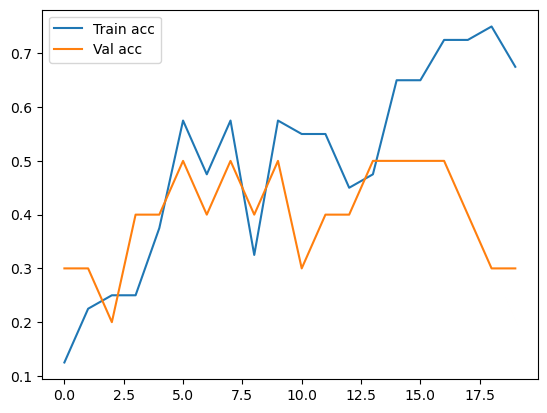

In [15]:
# 2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

directory = r"C:\DATA\dataHoa_quangnv"
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255, # change range (0, 1)
    rotation_range=30, # augumentation
    zoom_range=0.2, # augumentation
    horizontal_flip=True, # augumentation
    validation_split=0.2  # 20% validation
)

train_data = train_datagen.flow_from_directory(
    directory,
    target_size=img_size, # resize image
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    directory,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)
from tensorflow.keras import layers, models

# Xây dựng CNN 5 layer
model = models.Sequential([
    # 1️⃣ Conv Layer 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    # 2️⃣ Conv Layer 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # 3️⃣ Conv Layer 3
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # 4️⃣ Flatten để đưa sang fully-connected
    layers.Flatten(),

    # 5️⃣ Dense layer (ẩn + dropout + đầu ra)
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # 5 lớp hoa
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.show()





In [14]:
import os

# directory = r"C:\DATA\dataHoa_quangnv"

base_dir = r"C:\DATA\dataHoa_quangnv"

total = 0
for cls in os.listdir(base_dir):
    path = os.path.join(base_dir, cls)
    if os.path.isdir(path):
        num_files = len([f for f in os.listdir(path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        print(f"{cls}: {num_files} ảnh")
        total += num_files

print("Tổng số ảnh:", total)


daisy: 10 ảnh
dandelion: 10 ảnh
rose: 10 ảnh
sunflower: 10 ảnh
tulip: 10 ảnh
Tổng số ảnh: 50


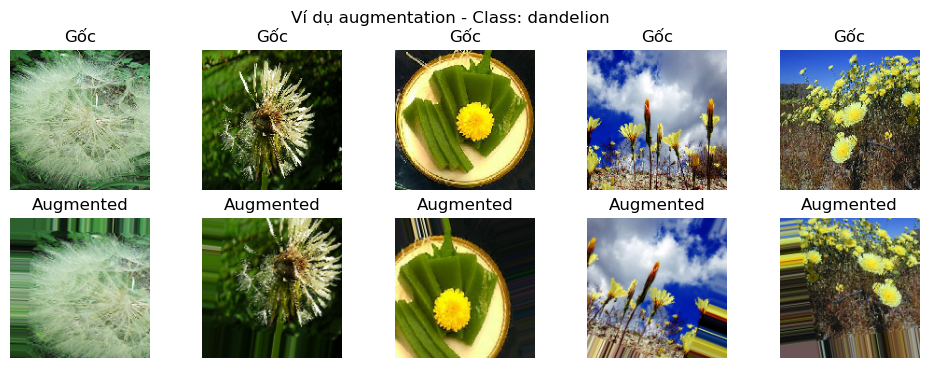

✅ Đã lưu ảnh augmentation vào: C:\DATA\data_hoa_aug_Quangnv\dandelion


In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
# Nguyễn Việt Quang B22DCCN650
# Đường dẫn gốc và thư mục mới
base_dir = r"C:\DATA\flower"
aug_dir = r"C:\DATA\data_hoa_aug_Quangnv"

# Tạo thư mục mới nếu chưa có
os.makedirs(aug_dir, exist_ok=True)

# ==============================
# 1️⃣ Tạo generator với 4 kỹ thuật augmentation
# ==============================
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# ==============================
# 2️⃣ Chọn ngẫu nhiên 1 class để demo augmentation
# Nguyễn Việt Quang B22DCCN650
# ==============================
class_name = np.random.choice(os.listdir(base_dir))
class_path = os.path.join(base_dir, class_name)
save_class_path = os.path.join(aug_dir, class_name)
os.makedirs(save_class_path, exist_ok=True)

# Lấy 5 ảnh đầu tiên trong class đó
image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.webp'))][:5]

# ==============================
# 3️⃣ Hiển thị 5 ảnh gốc
# Nguyễn Việt Quang B22DCCN650
plt.figure(figsize=(12, 4))
for i, file in enumerate(image_files):
    img_path = os.path.join(class_path, file)
    img = load_img(img_path, target_size=(150, 150))
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Gốc")
    # Chuyển sang array để augmentation
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # Sinh 1 ảnh augmented và lưu
    aug_iter = datagen.flow(x, batch_size=1, save_to_dir=save_class_path, save_prefix='aug', save_format='jpg')
    aug_img = next(aug_iter)[0].astype('uint8')

    # Hiển thị ảnh sau augmentation
    plt.subplot(2, 5, i + 6)
    plt.imshow(aug_img)
    plt.axis('off')
    plt.title("Augmented")

plt.suptitle(f"Ví dụ augmentation - Class: {class_name}")
plt.show()

print(f"✅ Đã lưu ảnh augmentation vào: {save_class_path}")


Found 4 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,994,305 (7.61 MB)

 Trainable params: 1,994,305 (7.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


D:\program-file\envs\assign6_recommender\Lib\site-packages\keras\src\ops\nn.py:938: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
D:\program-file\envs\assign6_recommender\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 1.0000 - loss:

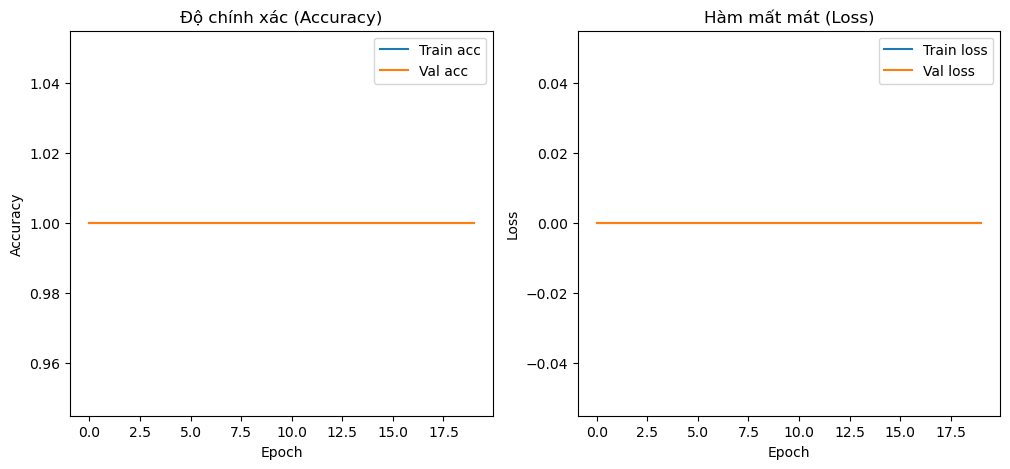


🎯 Train accuracy: 1.000 | Validation accuracy: 1.000
🎯 Train loss: 0.000 | Validation loss: 0.000
✅ Nhận xét: Mô hình **chưa bị overfitting rõ rệt**, độ chính xác train/val tương đối cân bằng.


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# ============================================
# 1️⃣ Đọc dữ liệu đã augment (sinh ở bước 1)
# Nguyễn Việt Quang B22DCCN650
# ============================================
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    r"C:\DATA\data_hoa_aug_Quangnv",
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    r"C:\DATA\data_hoa_aug_Quangnv",
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# ============================================
# 2️⃣ Xây dựng CNN với 5 layer
# Nguyễn Việt Quang B22DCCN650
# ============================================
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ============================================
# 3️⃣ Huấn luyện mô hình
# Nguyễn Việt Quang B22DCCN650
# ============================================
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    verbose=1
)

# ============================================
# 4️⃣ Visualize Loss và Accuracy
# Nguyễn Việt Quang B22DCCN650
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title("Độ chính xác (Accuracy)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title("Hàm mất mát (Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# ============================================
# 5️⃣ Nhận xét về Overfitting
# Nguyễn Việt Quang B22DCCN650

train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"\n🎯 Train accuracy: {train_acc:.3f} | Validation accuracy: {val_acc:.3f}")
print(f"🎯 Train loss: {train_loss:.3f} | Validation loss: {val_loss:.3f}")

if (train_acc - val_acc) > 0.1 and (val_loss > train_loss):
    print("⚠️ Nhận xét: Mô hình có dấu hiệu **overfitting** — mô hình học tốt trên tập huấn luyện nhưng kém tổng quát trên tập validation.")
else:
    print("✅ Nhận xét: Mô hình **chưa bị overfitting rõ rệt**, độ chính xác train/val tương đối cân bằng.")
